### 비트코인 가격 예측
https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [5]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

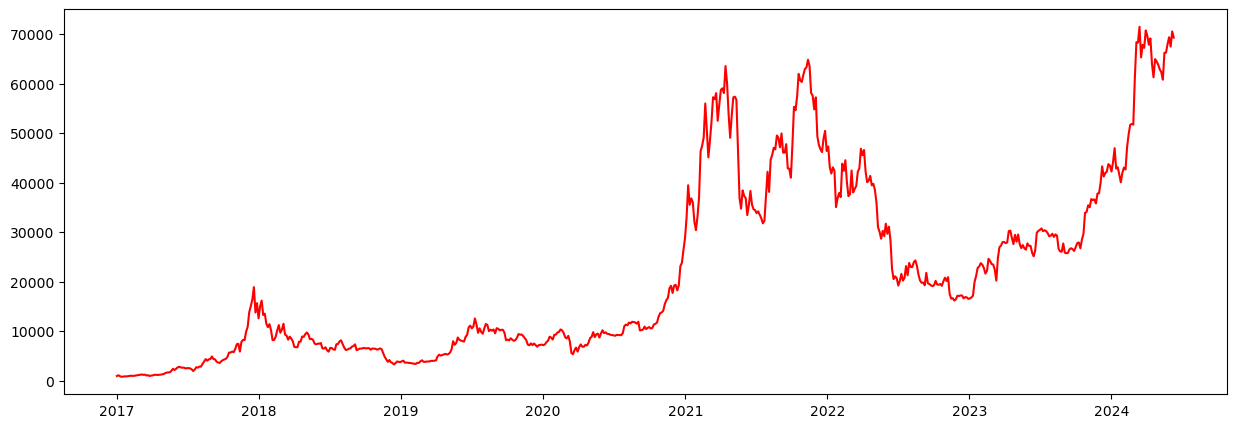

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))


plt.plot(bitcoin_df['2017-01-01':], c='red')
plt.show()

In [7]:
import numpy as np

# 수익률 df
rate_bitcoin_df = np.log(bitcoin_df / bitcoin_df.shift(1))
rate_bitcoin_df

,y
x,
2009-01-03,NaN
2009-01-07,NaN
2009-01-11,NaN
2009-01-15,NaN
2009-01-19,NaN
...,...
2024-05-24,0.024980
2024-05-28,0.020857
2024-06-01,-0.027610


<Axes: xlabel='x'>

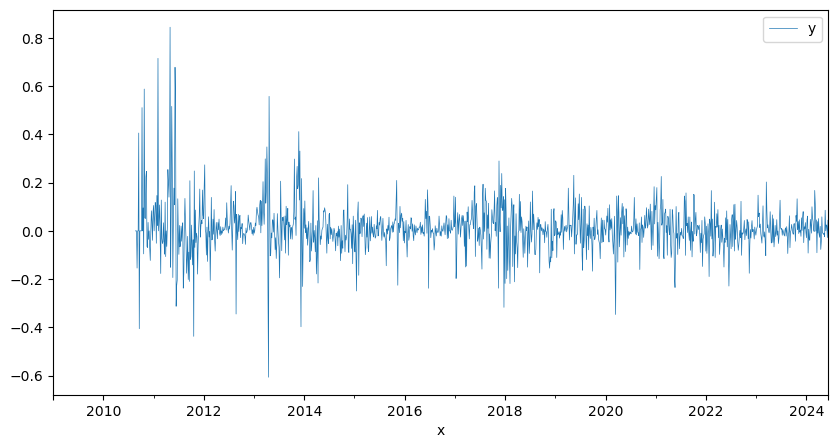

In [8]:
# 일간 수익률
rate_bitcoin_df[['y']].plot(figsize=(10, 5), lw=0.5)

In [9]:
bitcoin_df = bitcoin_df[['y']].dropna()

In [10]:
window = 20

bitcoin_df['min'] = bitcoin_df['y'].rolling(window=window).min()
bitcoin_df['mean'] = bitcoin_df['y'].rolling(window=window).mean()
bitcoin_df['std'] = bitcoin_df['y'].rolling(window=window).std()
bitcoin_df['median'] = bitcoin_df['y'].rolling(window=window).median()
bitcoin_df['max'] = bitcoin_df['y'].rolling(window=window).max()

bitcoin_df = bitcoin_df.dropna()
bitcoin_df

,y,min,mean,std,median,max
x,,,,,,
2009-03-20,0.00,0.00,0.0000,0.000000,0.0,0.00
2009-03-24,0.00,0.00,0.0000,0.000000,0.0,0.00
2009-03-28,0.00,0.00,0.0000,0.000000,0.0,0.00
2009-04-01,0.00,0.00,0.0000,0.000000,0.0,0.00
2009-04-05,0.00,0.00,0.0000,0.000000,0.0,0.00
...,...,...,...,...,...,...
2024-05-24,67942.23,60805.78,66133.4685,3065.494173,66252.6,71489.22
2024-05-28,69374.17,60805.78,66186.8320,3114.222252,66252.6,71489.22
2024-06-01,67484.93,60805.78,65986.6175,2874.911875,66252.6,70754.69


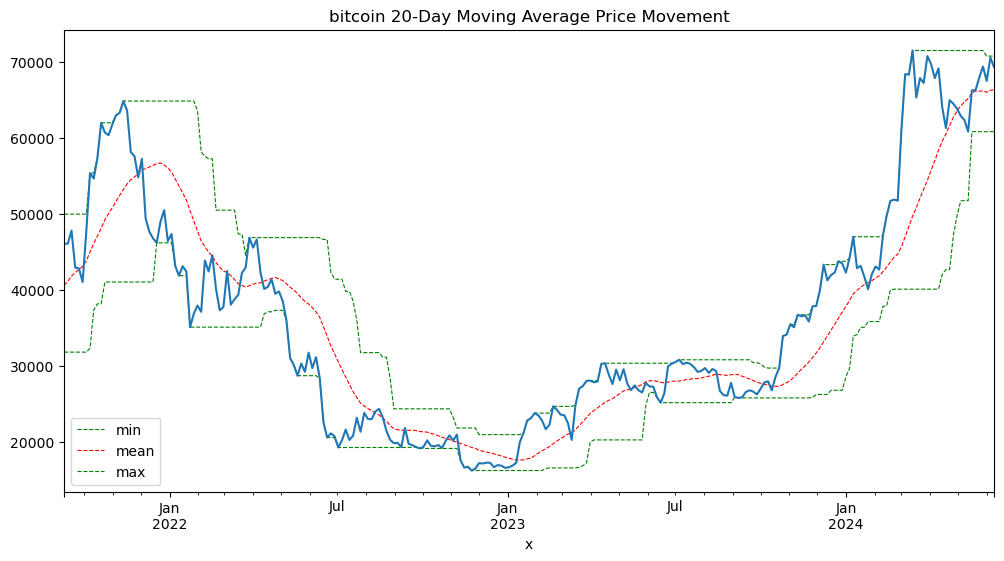

In [11]:
import matplotlib.pyplot as plt

ax = bitcoin_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
bitcoin_df['y'].iloc[-252:].plot(ax=ax)
plt.title("bitcoin 20-Day Moving Average Price Movement")
plt.show()

In [12]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
bitcoin_df['SMA1'] = bitcoin_df['y'].rolling(window=21).mean() #short-term
# 장기
bitcoin_df['SMA2'] = bitcoin_df['y'].rolling(window=252).mean() #long-term

bitcoin_df[['y', 'SMA1', 'SMA2']].tail()

,y,SMA1,SMA2
x,,,
2024-05-24,67942.23,66240.335238,35938.461587
2024-05-28,69374.17,66287.787619,36017.234087
2024-06-01,67484.93,66248.646190,36090.361349
2024-06-05,70553.24,66204.075714,36183.208056
2024-06-09,69297.93,66394.278571,36259.995952


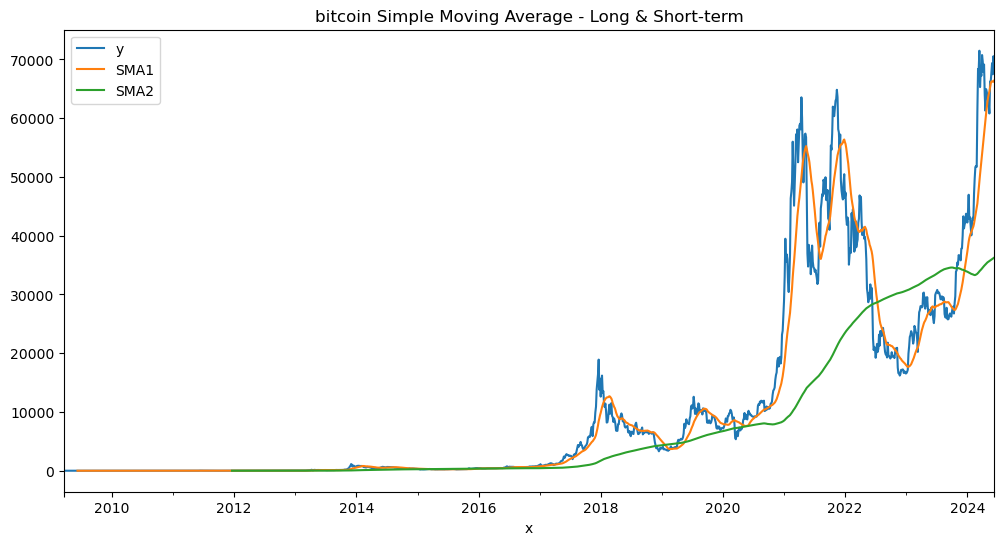

In [13]:
bitcoin_df[['y', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("bitcoin Simple Moving Average - Long & Short-term")
plt.show()

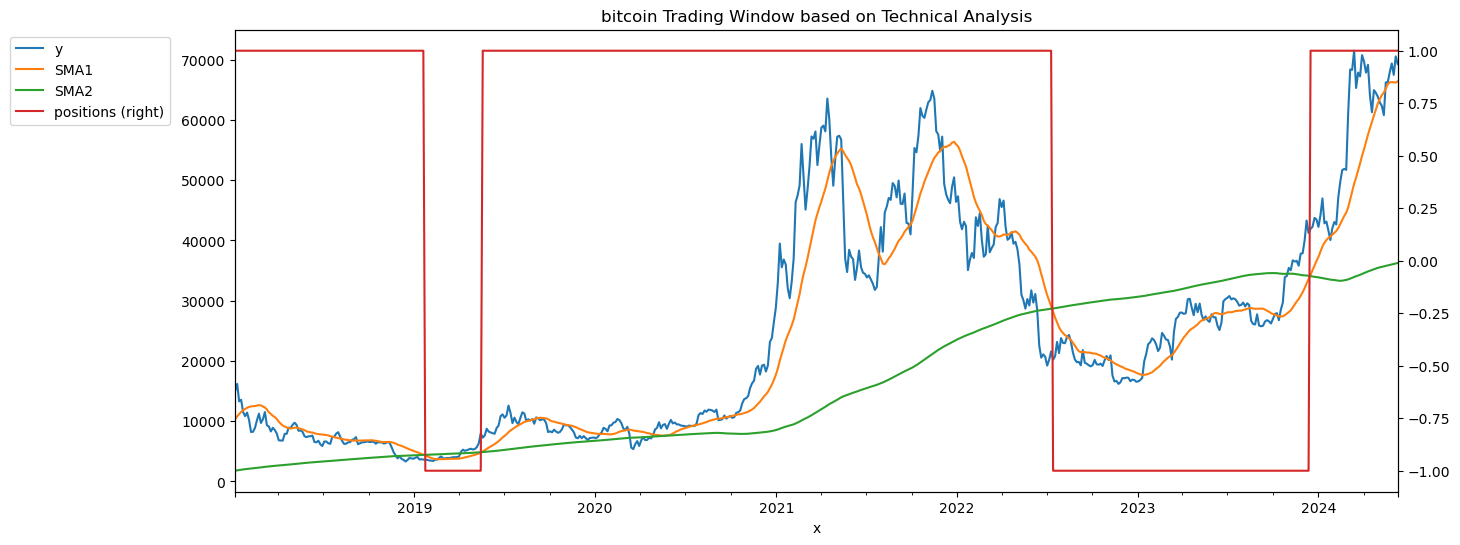

In [14]:
# 비트코인 분석
# 골든 크로스, 데드 크로스
bitcoin_df.dropna(inplace=True)

bitcoin_df['positions'] = np.where(bitcoin_df['SMA1'] > bitcoin_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = bitcoin_df[['y', 'SMA1', 'SMA2', 'positions']]['2018':].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("bitcoin Trading Window based on Technical Analysis")
plt.show()

# arima 모델을 통한 추가 예측

In [15]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [16]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [17]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

In [18]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


In [19]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

In [20]:
bitcoin_df = bitcoin_df[['y']].loc['2018':]
bitcoin_df

,y
x,
2018-01-04,15039.24
2018-01-08,16192.91
2018-01-12,13285.55
2018-01-16,13554.14
2018-01-20,11506.51
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [21]:
y_train = bitcoin_df['y'][:int(0.8 * len(bitcoin_df))]
y_test = bitcoin_df['y'][int(0.8 * len(bitcoin_df)):]

<Axes: xlabel='x'>

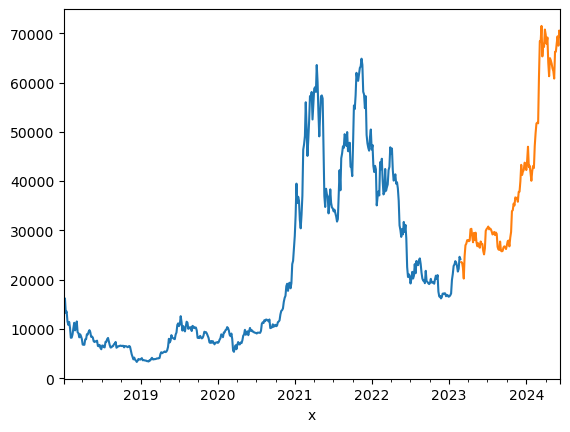

In [22]:
y_train.plot()
y_test.plot()

In [23]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diff = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diff = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

# 이 3개 중 최대값을 가져오면 된다.
n_diffs = max(kpss_diffs, adf_diff, pp_diff)

print(f"d = {n_diffs}")


d = 1


In [24]:
import pmdarima as pm
model = pm.auto_arima(y = y_train,
                      d = 1,
                      start_p =0,
                      max_p = 4,
                      start_q = 0,
                      max_q = 21,
                      m=1,
                      seasonal = False, 
                      stepwise = True,
                      trace = True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8457.479, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8454.126, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8453.733, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8455.525, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8455.400, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8455.337, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8457.106, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8451.758, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8453.429, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8453.363, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8452.152, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8455.052, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.361 seconds


In [25]:
model.fit(y_train)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
# Prob(Q), 융-박스 검정 통계량 (0.96)
# 현재 서로 독립적이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 현재 분산을 따르지 않는다.


# Prob(JB), 자크-베라 검정 통계량 (0)
# 현재 일정한 평균과 분산을 따르지 않는다

# 이 3가지 검증을 가지고 금융 데이터에서 어떤 상품을 추천할 지 예측할 수 있음 (장기적 투가는 고위험, 단기 투자 권장) 이런식으로 작성

# Skew(쏠린 정도, 왜도)
# 음수쪽 방향이 꼬리가 길게 나타날 수 있음

# Kurtosis(뾰족한 정도, 첨도)
# 뾰족함

print(model.summary())

# N(0, 1) 정규분포

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  470
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4223.879
Date:                Wed, 12 Jun 2024   AIC                           8451.758
Time:                        14:16:12   BIC                           8460.060
Sample:                    01-04-2018   HQIC                          8455.025
                         - 02-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1102      0.025      4.414      0.000       0.061       0.159
sigma2      3.897e+06   1.35e+05     28.963      0.000    3.63e+06    4.16e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

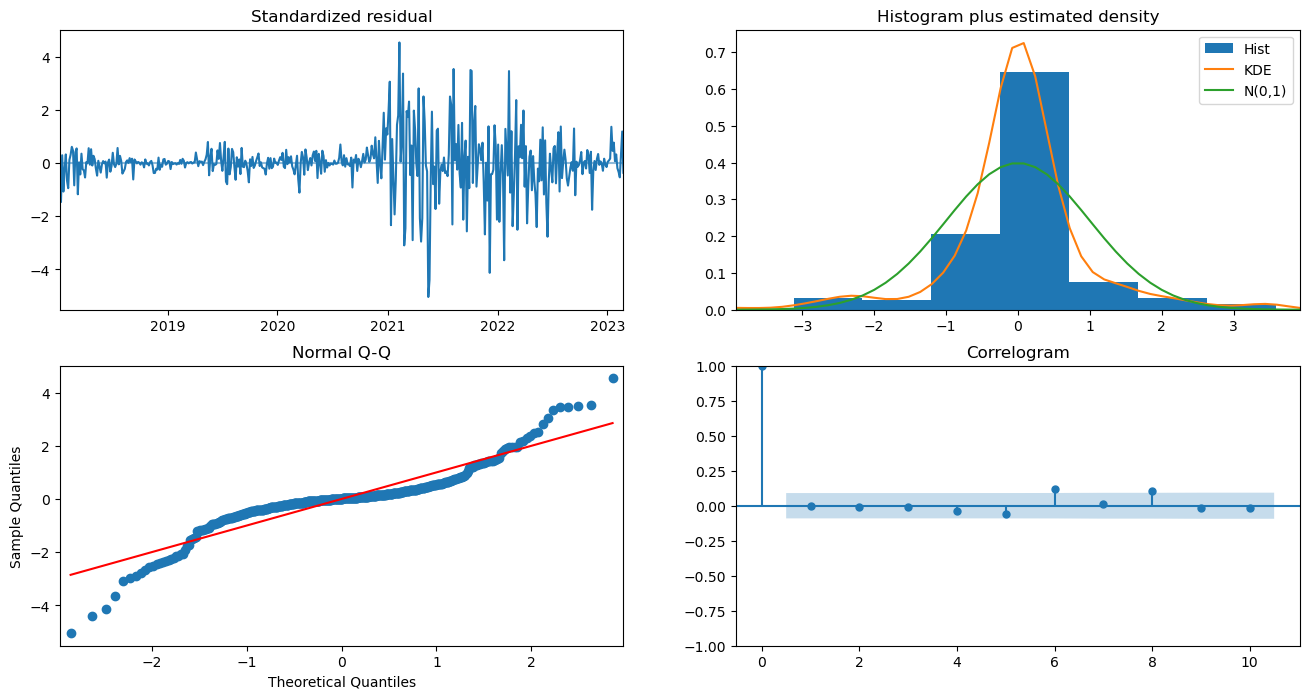

In [27]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

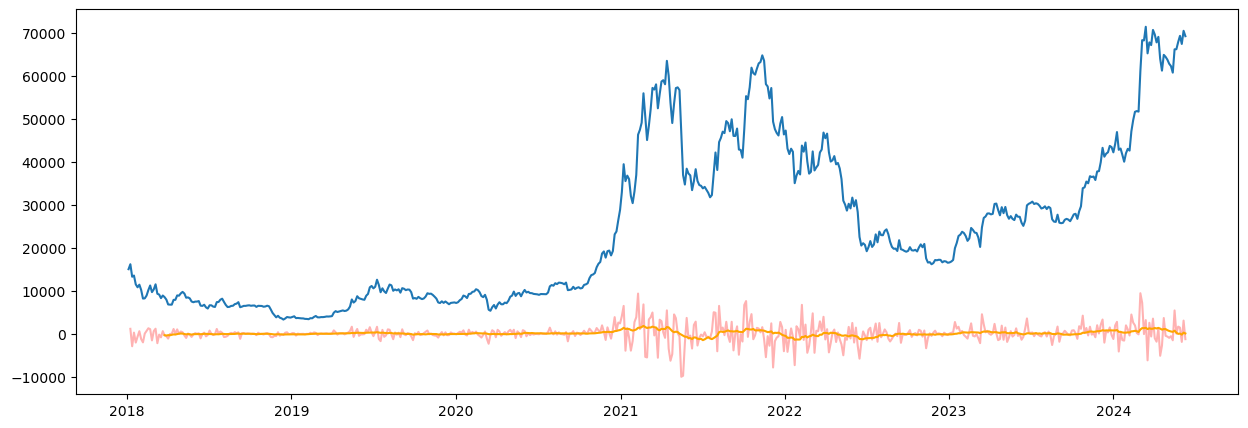

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# 차분 없이 원본 (비정상 시계열 데이터)
plt.plot(bitcoin_df['2018':])

# 1차 차분을 사용했을 때 데이터의 정상성을 확보할 수 있으며 필요시 추가적인 차분을 통해 정상성의 비율을 높일 수 있습니다.
plt.plot(bitcoin_df['2018':].diff().dropna(), c='red', alpha=0.3)
plt.plot(bitcoin_df['2018':].diff().dropna().rolling(20).mean(), c='orange')
plt.show()



In [29]:
# 한달 동안의 기간을 예측
prediction = model.predict(n_periods =1)
prediction.tolist()[0]

24106.756594431994

In [30]:
# 지속적으로 업데이트를 하기 위한 방법 (예측은 한발자국씩 진행되어야 함)
def predict_one_step():
    prediction = model.predict(n_periods =1)
    return (prediction.tolist()[0])

In [31]:
preds = []
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)
    
    

In [32]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
x,,
2023-02-27,23563.11,24106.756594
2023-03-03,23467.36,23503.053586
2023-03-07,22410.62,23463.414983
2023-03-11,20224.85,22294.260329
2023-03-15,24767.46,19993.861296
...,...,...
2024-05-24,67942.23,66219.624200
2024-05-28,69374.17,68102.486184
2024-06-01,67484.93,69493.521951


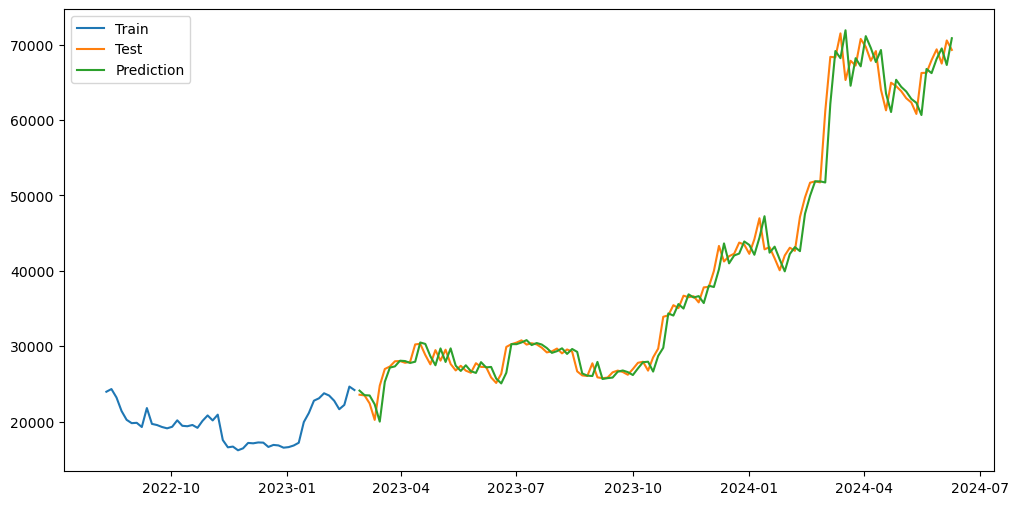

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-50:], label='Train')
plt.plot(y_test.iloc[:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [34]:
import numpy as np

# MAPE 함수 정의: 평균 절대 비율 오차 (Mean Absolute Percentage Error) 계산
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# MAPE 값을 계산하고 출력
# y_test와 p_list는 실제 값과 예측 값을 나타내는 변수로 가정합니다.
print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')


MAPE (%): 3.5491


In [35]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
bitcoin_df['SMA1'] = bitcoin_df['y'].rolling(window=20).mean() #short-term

# 장기
bitcoin_df['SMA2'] = bitcoin_df['y'].rolling(window=252).mean() #long-term

display(bitcoin_df[['y', 'SMA1', 'SMA2']].tail())

,y,SMA1,SMA2
x,,,
2024-05-24,67942.23,66133.4685,35938.461587
2024-05-28,69374.17,66186.8320,36017.234087
2024-06-01,67484.93,65986.6175,36090.361349
2024-06-05,70553.24,66249.0960,36183.208056
2024-06-09,69297.93,66321.1335,36259.995952


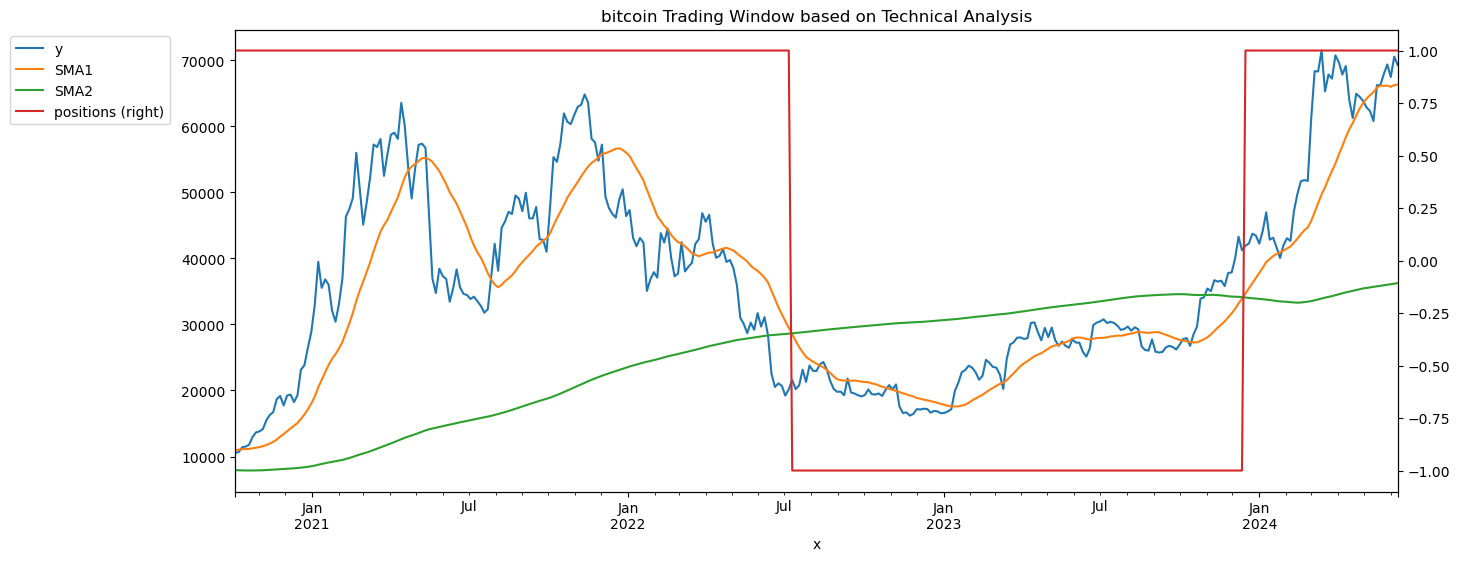

In [36]:
# 비트코인 분석
# 골든 크로스, 데드 크로스
bitcoin_df.dropna(inplace=True)

bitcoin_df['positions'] = np.where(bitcoin_df['SMA1'] > bitcoin_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = bitcoin_df[['y', 'SMA1', 'SMA2', 'positions']]['2018':].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("bitcoin Trading Window based on Technical Analysis")
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 0 1 0
mse = mean_squared_error(y_predict_df.test, y_predict_df.pred)
print("Mean Squared Error", mse)

mse = mean_squared_error(y_predict_df.test, y_predict_df.pred)
print("Root Mean Squared Error", mse ** (1/2))

msle = mean_squared_log_error(y_predict_df.test, y_predict_df.pred)
print("Mean Squared Log Error", msle)

Mean Squared Error 4560937.518494778
Root Mean Squared Error 2135.635155754554
Mean Squared Log Error 0.0025438678647448313
